# <font color=red>Importing Required library</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp,t,ttest_ind
from scipy.stats import f_oneway # Numeric Vs categorical
from scipy.stats import f# Numeric Vs categorical
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

# <font color=red>Dataset  loading</font>

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# <font color=red>Problem Statement</font>

- **The variable on which Demands for an ELectric Cycle in India will depends so that By-Cycle company can increase their Revenue. Also the factor which will affect demand.**

# <font color=red>Exploratory Data Analysis</font>

In [4]:
# Checking for shape of Dataset
df.shape

(10886, 12)

In [5]:
#Checking for information abaout data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#Converting/changing datatypes as per requirements

#Dattime is in object it should be in Datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

#Season is in int format while its a category so we have to convert it into category as season: 
#season (1: spring, 2: summer, 3: fall, 4: winter)
df['season'] = df['season'].astype('category')

#holiday & workingday is also a category 
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')


#Weather is also a categorical variable so we have to convert it into category
#weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df['weather'] = df['weather'].astype('category')

In [7]:
#checking for data type after conversion
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
#checkin for null value if present
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
#Statistical summary of data
#dropeed datetime for an instance just to get statistical summary of a data
df.drop(columns = 'datetime').describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [10]:
#dropping unwanted column for instance to avoid noise & for high computation
df = df.drop(columns=['temp','atemp', 'humidity', 'windspeed'])

# <font color=red>Graphical Analysis</font>

#### <font color=orange>1.Uni-Variate Analysis</font>

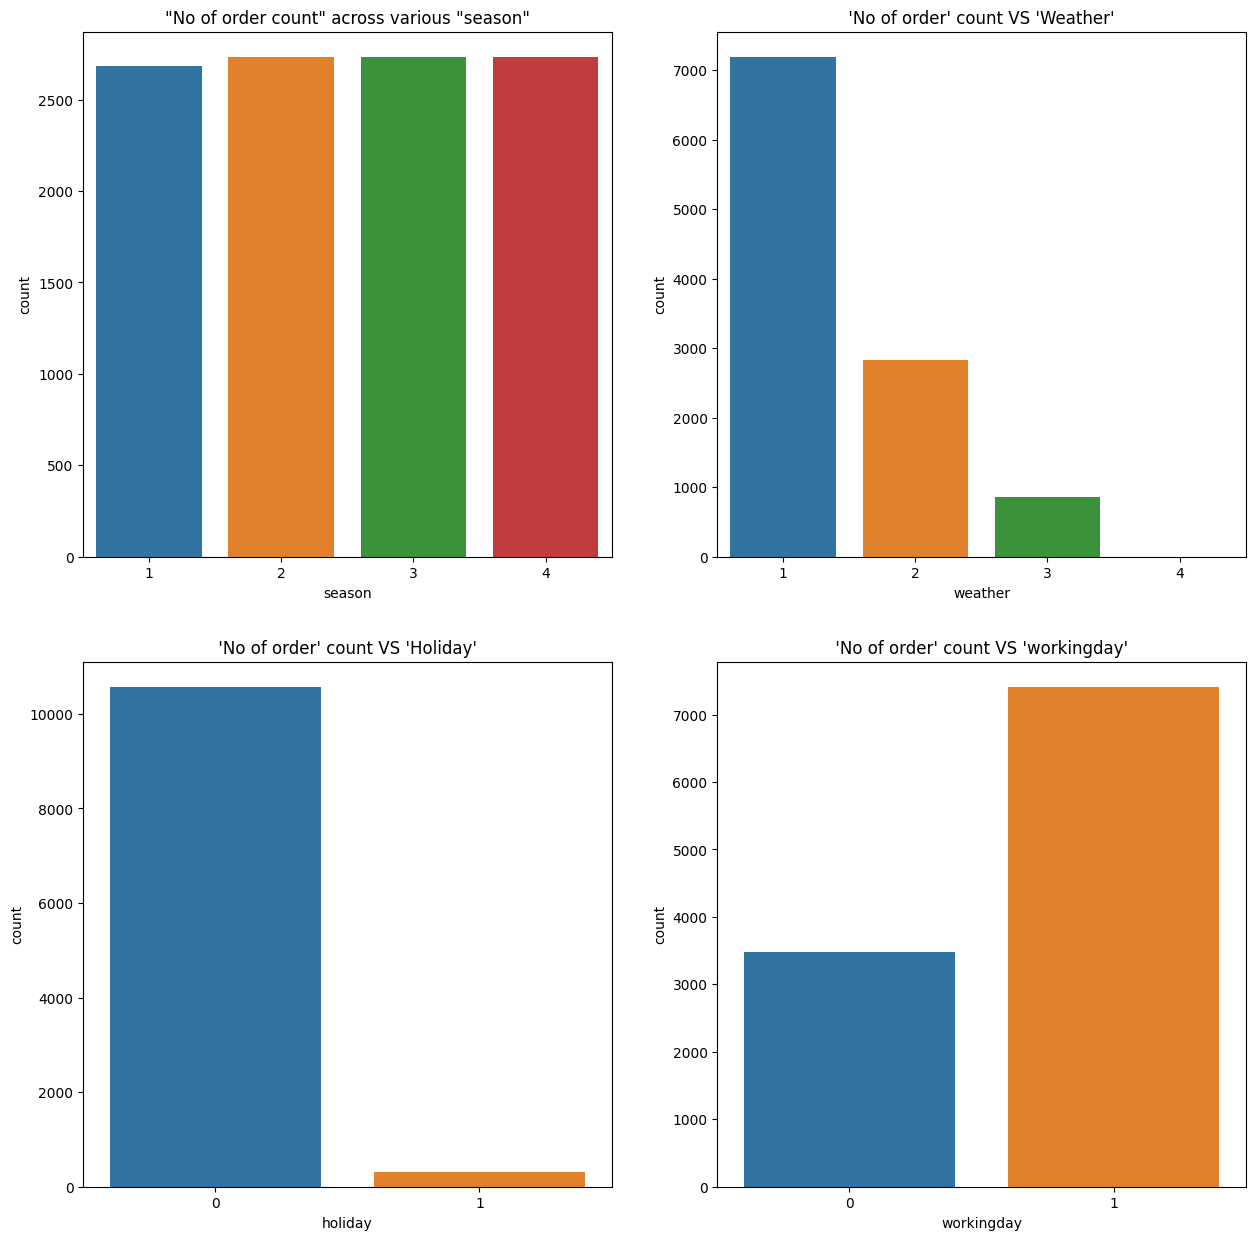

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(data=df,x=df['season'])
plt.title('"No of order count" across various "season"')

plt.subplot(2,2,2)
sns.countplot(data = df,x = df['weather'])
plt.title(" 'No of order' count VS 'Weather' ")

plt.subplot(2,2,3)
sns.countplot(data = df,x = df['holiday'])
plt.title(" 'No of order' count VS 'Holiday' ")

plt.subplot(2,2,4)
sns.countplot(data = df,x = df['workingday'])
plt.title(" 'No of order' count VS 'workingday' ")

plt.show()

#### <font color=orange>2.Bi-Variate Analysis</font>

 No of casual people vs ['season', 'holiday', 'workingday', 'weather'] 


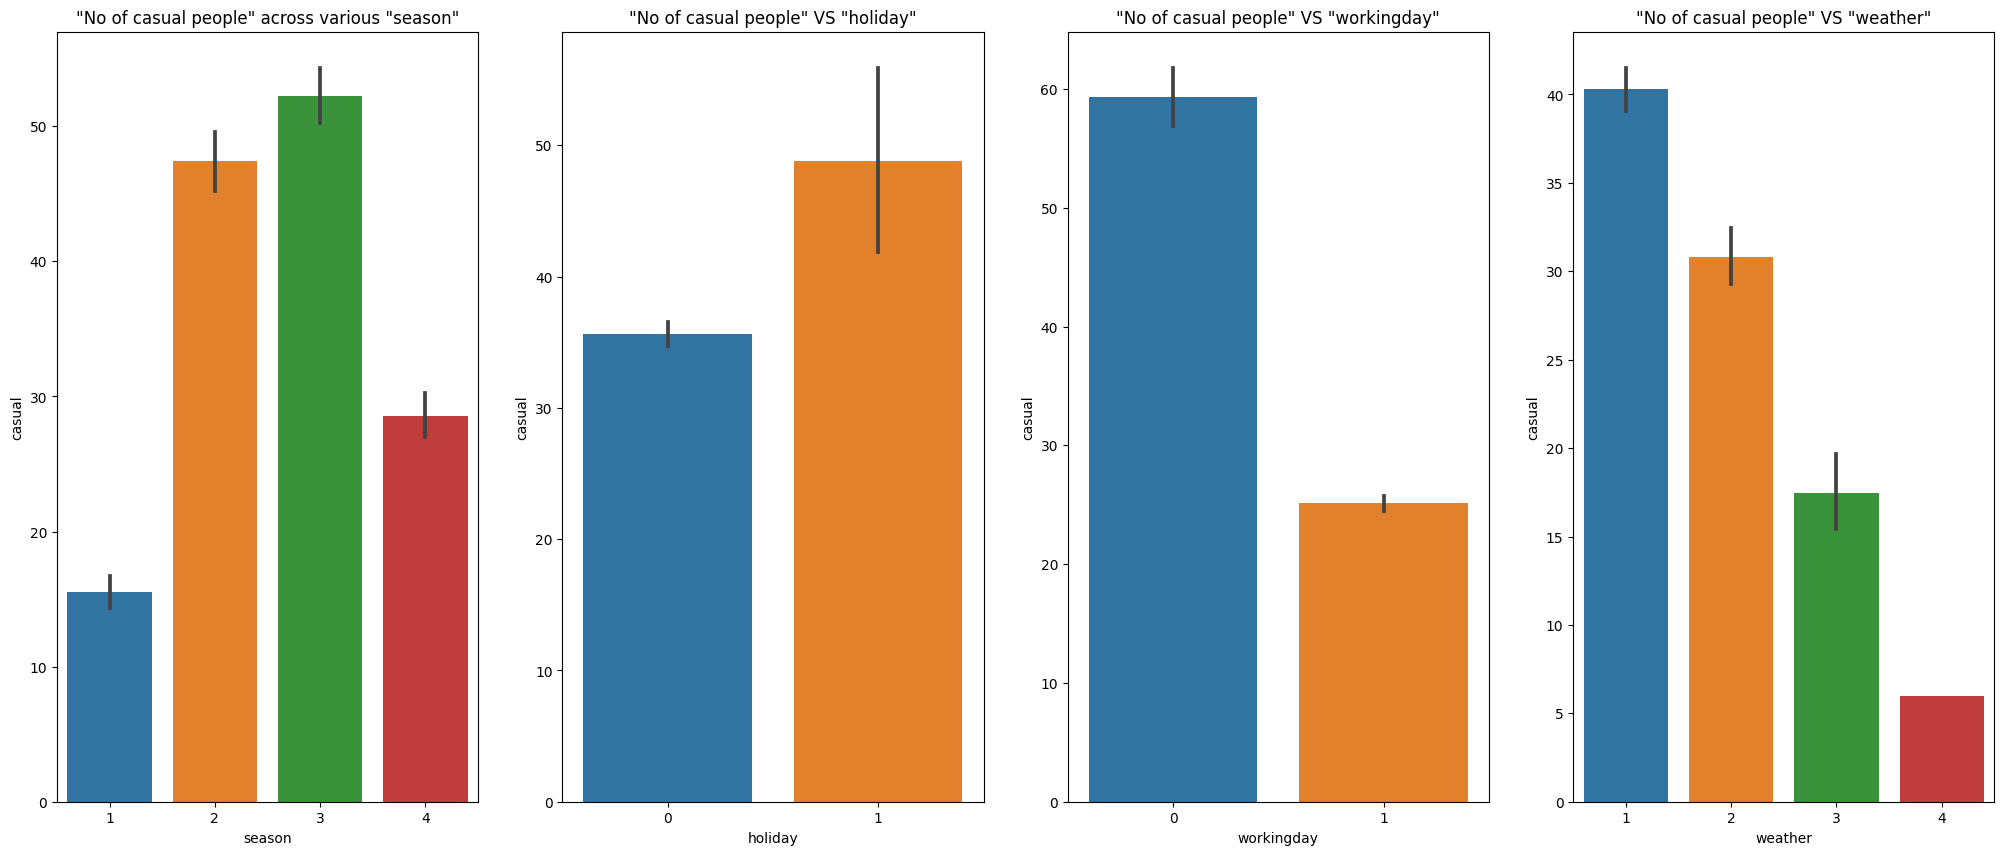


 No of registered people vs ['season', 'holiday', 'workingday', 'weather'] 


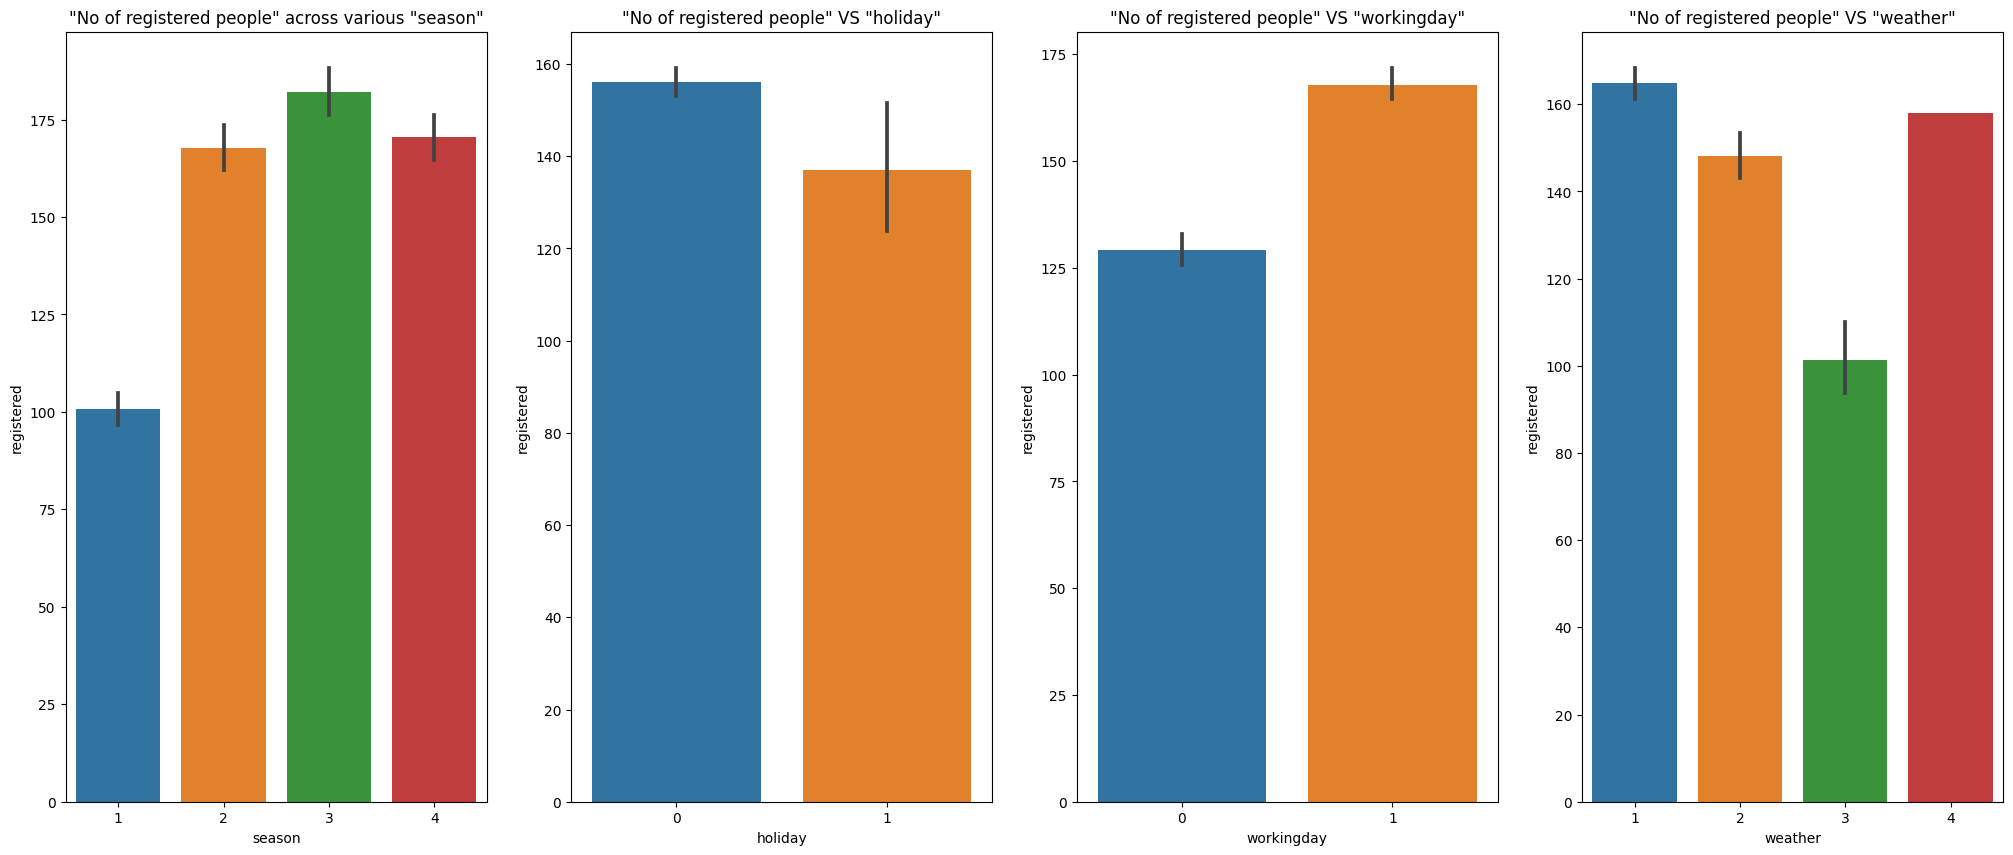

 No of Total count(registered + casual) people vs ['season', 'holiday', 'workingday', 'weather'] 


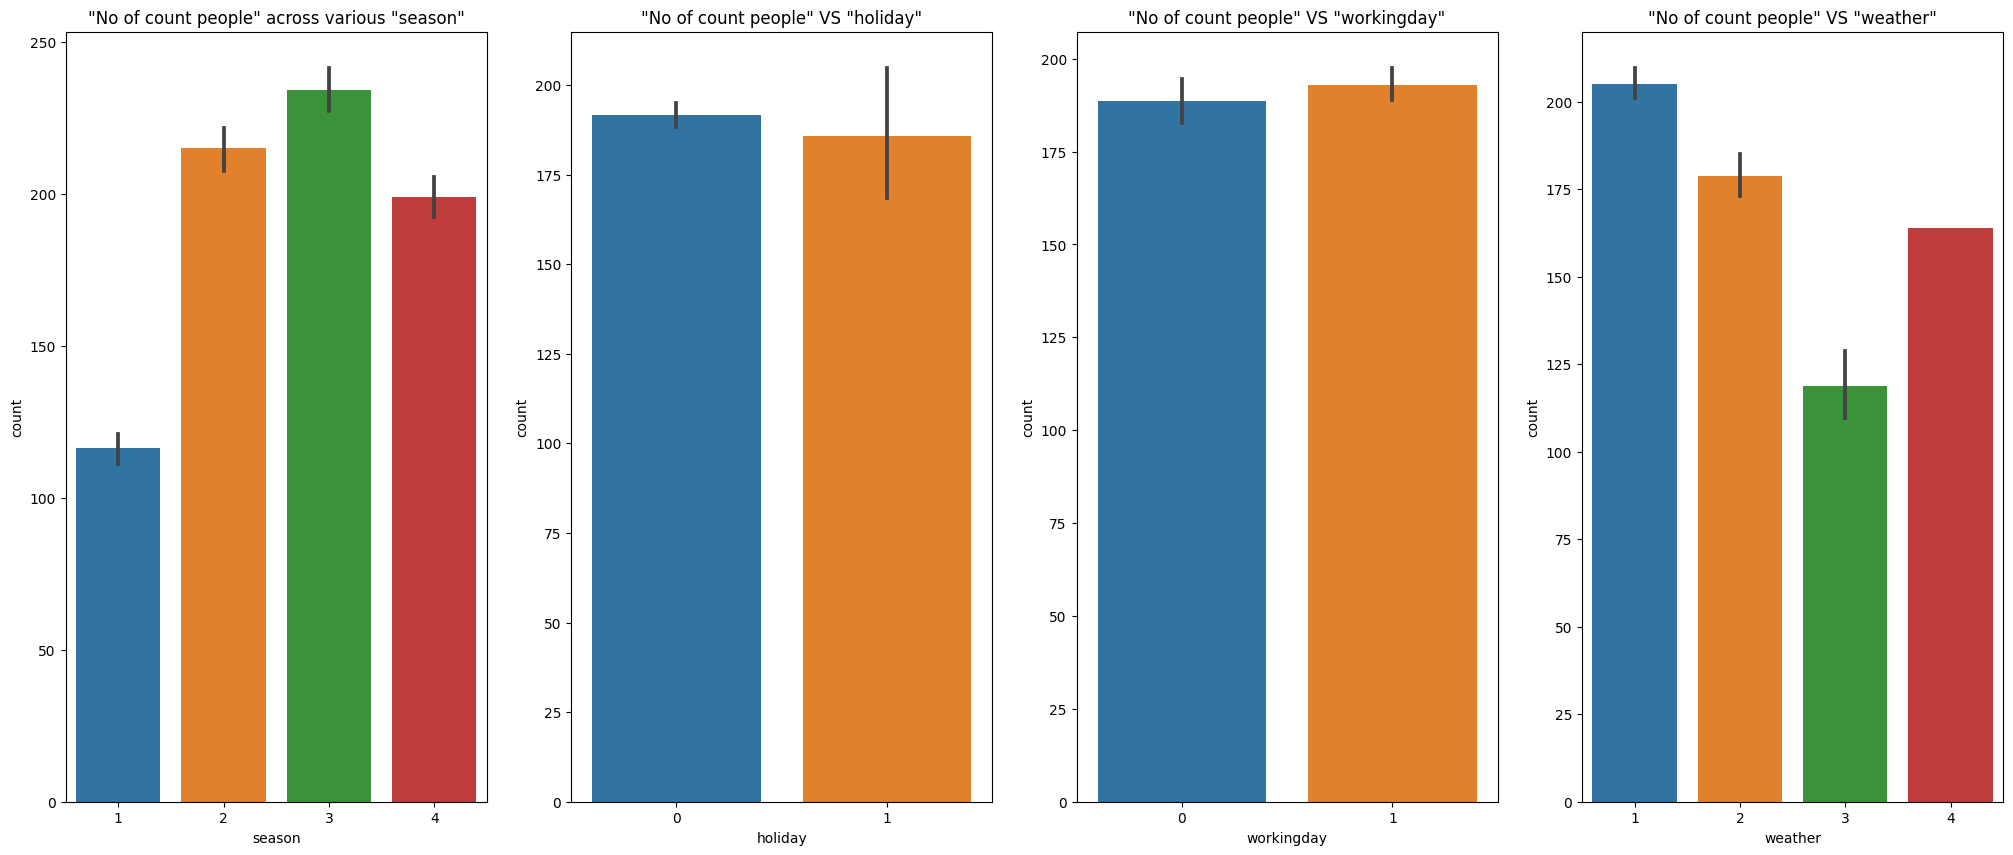

In [12]:
### Graph for casual people vs Various category
print(""" No of casual people vs ['season', 'holiday', 'workingday', 'weather'] """)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
sns.barplot(data=df,x = df['season'],y=df['casual'])
plt.title('"No of casual people" across various "season"')

plt.subplot(1,4,2)
sns.barplot(data=df,x = df['holiday'],y=df['casual'])
plt.title('"No of casual people" VS "holiday"')

plt.subplot(1,4,3)
sns.barplot(data=df,x = df['workingday'],y=df['casual'])
plt.title('"No of casual people" VS "workingday"')

plt.subplot(1,4,4)
sns.barplot(data=df,x = df['weather'],y=df['casual'])
plt.title('"No of casual people" VS "weather"')

plt.show()
print()





### Graph for registered people vs Various category
print(""" No of registered people vs ['season', 'holiday', 'workingday', 'weather'] """)
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
sns.barplot(data=df,x = df['season'],y=df['registered'])
plt.title('"No of registered people" across various "season"')

plt.subplot(1,4,2)
sns.barplot(data=df,x = df['holiday'],y=df['registered'])
plt.title('"No of registered people" VS "holiday"')

plt.subplot(1,4,3)
sns.barplot(data=df,x = df['workingday'],y=df['registered'])
plt.title('"No of registered people" VS "workingday"')

plt.subplot(1,4,4)
sns.barplot(data=df,x = df['weather'],y=df['registered'])
plt.title('"No of registered people" VS "weather"')

plt.show()



### Graph for Total count(registered + casual) people vs Various category
print(""" No of Total count(registered + casual) people vs ['season', 'holiday', 'workingday', 'weather'] """)
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
sns.barplot(data=df,x = df['season'],y=df['count'])
plt.title('"No of count people" across various "season"')

plt.subplot(1,4,2)
sns.barplot(data=df,x = df['holiday'],y=df['count'])
plt.title('"No of count people" VS "holiday"')

plt.subplot(1,4,3)
sns.barplot(data=df,x = df['workingday'],y=df['count'])
plt.title('"No of count people" VS "workingday"')

plt.subplot(1,4,4)
sns.barplot(data=df,x = df['weather'],y=df['count'])
plt.title('"No of count people" VS "weather"')

plt.show()

#### <font color=orange>3. Checking for outliers</font>

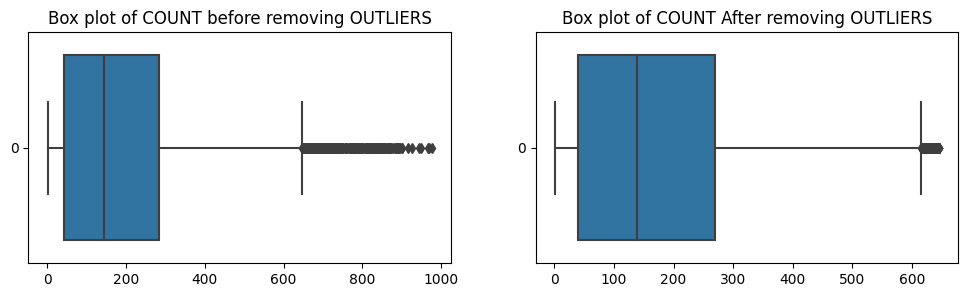

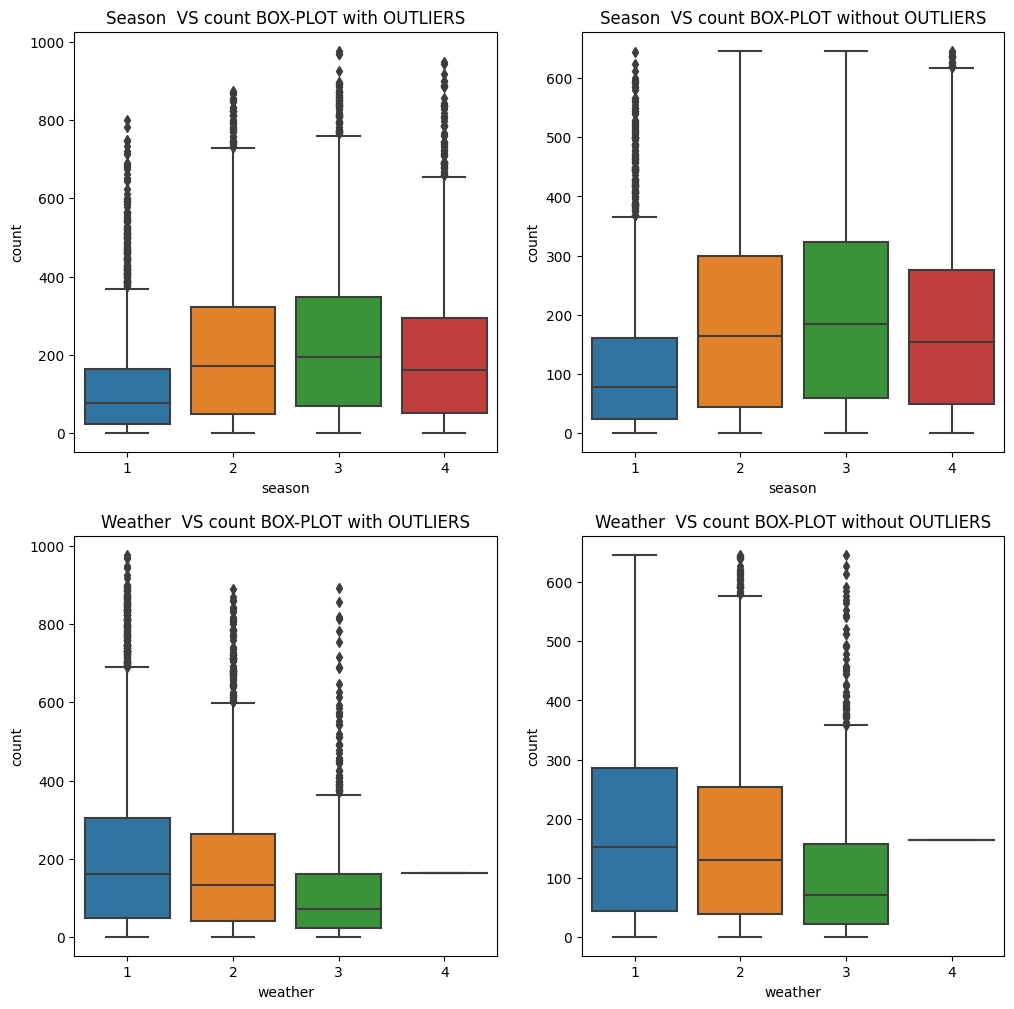

In [13]:
#Removing ouliers using Quantile
Q_1,Q_3 = df['count'].quantile([0.25,0.75])
iqr = Q_3 - Q_1
df_wo_outliers = df.loc[((df['count'] > (Q_1 - 1.5*iqr)) & (df['count'] < (Q_3 + 1.5*iqr)))]


plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('Box plot of COUNT before removing OUTLIERS')
sns.boxplot(df['count'],orient='h')

plt.subplot(1,2,2)
plt.title('Box plot of COUNT After removing OUTLIERS')
sns.boxplot(df_wo_outliers['count'],orient='h')

plt.show()


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='season',y='count')
plt.title('Season  VS count BOX-PLOT with OUTLIERS')

plt.subplot(2,2,2)
sns.boxplot(data=df_wo_outliers,x='season',y='count')
plt.title('Season  VS count BOX-PLOT without OUTLIERS')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='weather',y='count')
plt.title('Weather  VS count BOX-PLOT with OUTLIERS')

plt.subplot(2,2,4)
sns.boxplot(data=df_wo_outliers,x='weather',y='count')
plt.title('Weather  VS count BOX-PLOT without OUTLIERS')

plt.show()

# <font color=red>Hypothesis Testing</font>

### <font color=orange>1. Sample T-Test to check if Working Day has an effect on the number of electric cycles rented</font>

In [14]:
df_wo_outliers['workingday'].value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

In [15]:
#As we can see the sample size are different we have to randomply select min-Sample size i.e..3422
working = df_wo_outliers.loc[df_wo_outliers['workingday']==1,'casual'].sample(3422)
not_working = df_wo_outliers.loc[df_wo_outliers['workingday']==0,'casual'].sample(3422)

# Ho : mu1 = mu2 (Working day has no effect on No of count)
# Ha : mu1 < mu2 (Working day has some effect on No of count)
#the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample

alpha=0.01


print(f'Mean of Working is {working.mean()} & Not working is {not_working.mean()}')
test_statistic, p_value=ttest_ind(working,not_working,alternative="less")
print(f'Test statics is {test_statistic} & p_value is {p_value}')
if p_value<alpha:
    print("Reject H0")
    print("working day has major effect on No of cycle rented & difference is significant")
else:
    print("Fail to Reject H0 ")
    print("working day has No effect on No of cycle rented & difference is Not significant")


Mean of Working is 23.199298655756866 & Not working is 55.9926943308007
Test statics is -26.388139628658323 & p_value is 1.5927546072340748e-146
Reject H0
working day has major effect on No of cycle rented & difference is significant


-<font color=green>Note: **This mean that Not-working will have higher Count as compared to Working day**</font>

# <font color=red>ANNOVA test</font>

**There are three primary assumptions in ANOVA:**
- The responses for each factor level have a normal population distribution.
- These distributions have the same variance.
- The data are independent.


### <font color=orange>1. No. of cycles rented similar or different in different weather</font>

In [16]:
# weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy  = a
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = b
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = c
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = d

a = df_wo_outliers.loc[df_wo_outliers['weather']==1,'count']
b = df_wo_outliers.loc[df_wo_outliers['weather']==2,'count']
c = df_wo_outliers.loc[df_wo_outliers['weather']==3,'count']
d = df_wo_outliers.loc[df_wo_outliers['weather']==4,'count']

print(f'a shape : {a.shape}, b shape : {b.shape},c shape : {c.shape}, d shape : {d.shape} ')

a shape : (6962,), b shape : (2770,),c shape : (850,), d shape : (1,) 


In [17]:
#as we can see size of d is 1 its of no USE
#making sample size same for all other a,b,c as 850
a = a.sample(850)
b = b.sample(850)
c = c.sample(850)
print(f'a shape : {a.shape}, b shape : {b.shape},c shape : {c.shape}')

a shape : (850,), b shape : (850,),c shape : (850,)


- **1.Checking for assumption no 1 for ANnova i.e. Normality** 

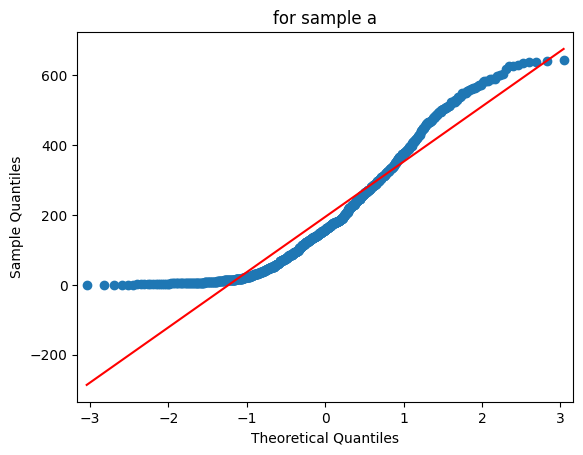

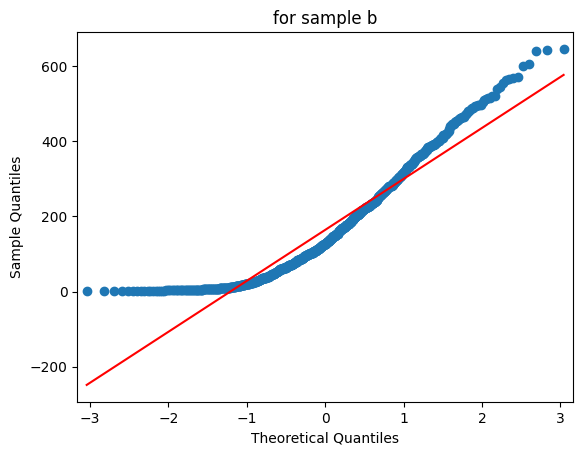

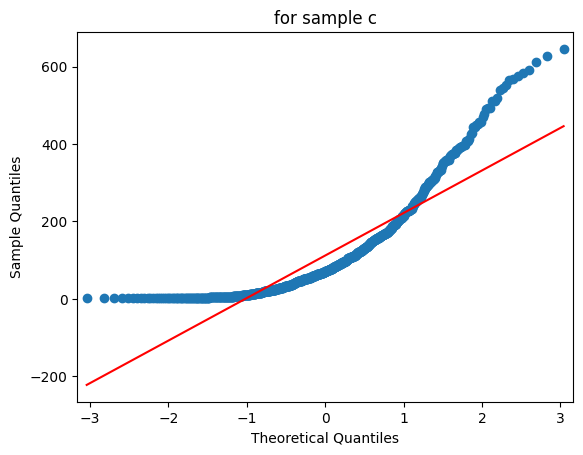

In [18]:
#Checking for Normality assumption 1 of ANNOVA
qqplot(a,line='r')
plt.title('for sample a')
plt.show()


qqplot(b,line='r')
plt.title('for sample b')
plt.show()


qqplot(c,line='r')
plt.title('for sample c')
plt.show()

- **2.Checking for assumption no 2 for ANnova Variance of dis are same i.e. Same Variance for all distribution** 

In [19]:
print("Method 1 for Variance Test")
print()
'''levene Test is used to check Variance of diff group are same or not
Ho: The null hypothesis for Levene’s test is that the variance among groups is equal.
Ha: The alternative hypothesis is that the variance among different groups is not equal 
(for at least one pair the variance is not equal to others).'''
from scipy.stats import levene

alpha =0.05
# now we pass the groups and center value from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value =levene(a,b,c, center ='mean')
 
if p_value > alpha :
    print("We do not reject the null hypothesis")
    print('The null hypothesis for Levene’s test is that the variance among groups is equal.')
else:
    print("Reject the Null Hypothesis")
    print('The alternative hypothesis is that the variance among different groups is not equal')

# print()
# print('Method 2 for Variance Test')
# print()
# print(a.describe(),b.describe(),c.describe(),sep=' ')

Method 1 for Variance Test

Reject the Null Hypothesis
The alternative hypothesis is that the variance among different groups is not equal


#### <font color=green>Note: **Both the assumption fails for ANNOVA so we cant use it, We can use other Test such as KRUSKAL**</font>

In [20]:

'''
A one-way ANOVA has the below given null and alternative hypotheses:
H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest
'''


print('Calculation using ANOVA')
alpha = 0.05

test_statistic, p_value = f_oneway(a,b,c,d)

print(f'Test statics is {test_statistic} & p_value is {p_value}')

if p_value<alpha:
    print("Reject H0")
    print("It states that there will be at least one population mean that differs from the rest")
else:
    print("Fail to Reject H0 ")
    print("It implies that the means of all the population are equal")

Calculation using ANOVA
Test statics is 48.44919182520279 & p_value is 1.9056766864603455e-30
Reject H0
It states that there will be at least one population mean that differs from the rest


### <font color=orange>2. No. of cycles rented similar or different in different seasons</font>

In [21]:
# season: season 
# (1: spring = a, 2: summer = b, 3: fall = c, 4: winter = d)


a = df_wo_outliers.loc[df_wo_outliers['season']==1,'count']
b = df_wo_outliers.loc[df_wo_outliers['season']==2,'count']
c = df_wo_outliers.loc[df_wo_outliers['season']==3,'count']
d = df_wo_outliers.loc[df_wo_outliers['season']==4,'count']

print(f'a shape : {a.shape}, b shape : {b.shape},c shape : {c.shape}, d shape : {d.shape} ')

a shape : (2670,), b shape : (2633,),c shape : (2616,), d shape : (2664,) 


In [22]:
#as we can see size of d is min for c so we have to take a sample size f 2616
#making sample size same for all other a,b,c,d as 2616
a = a.sample(2616)
b = b.sample(2616)
c = c.sample(2616)
d = d.sample(2616)
print(f'a shape : {a.shape}, b shape : {b.shape},c shape : {c.shape}, d shape : {d.shape} ')

a shape : (2616,), b shape : (2616,),c shape : (2616,), d shape : (2616,) 


- **1.Checking for assumption no 1 for ANnova i.e. Normality** 

QQ-PLOT for checking Normality


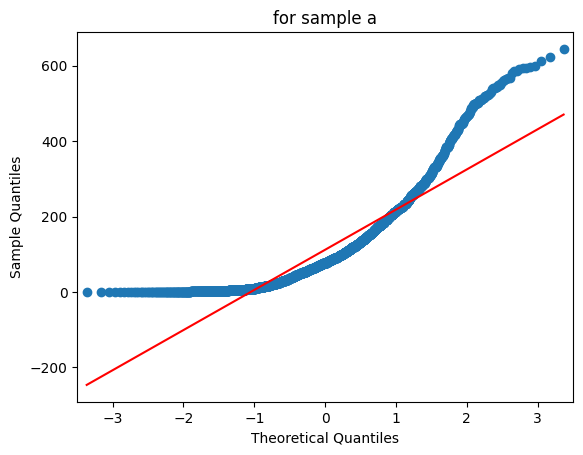

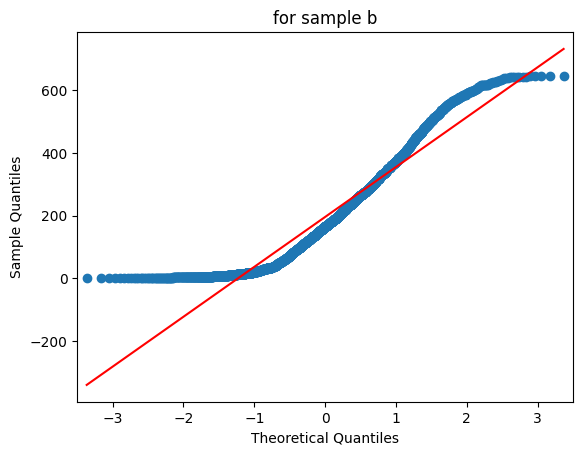

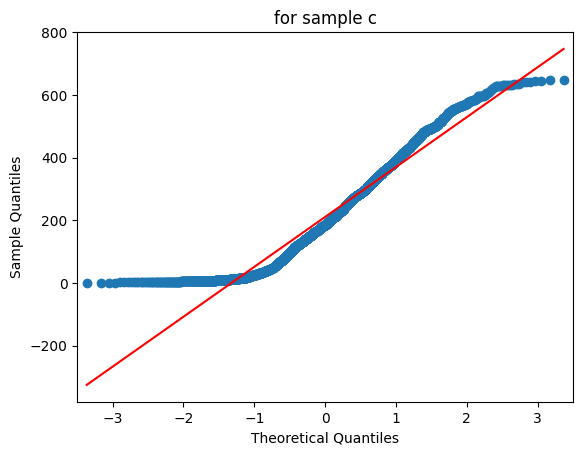

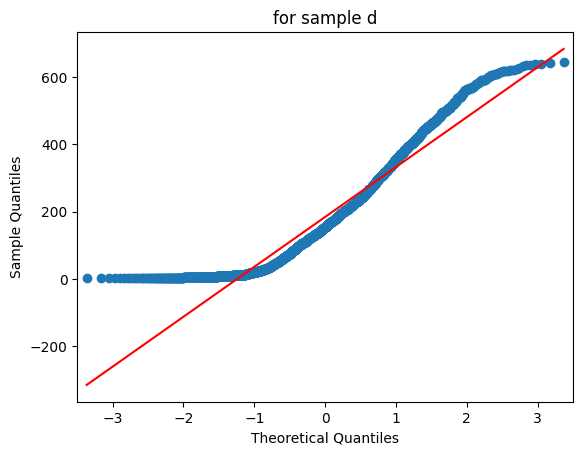

In [23]:
#Checking for Normality assumption 1 of ANNOVA
print('QQ-PLOT for checking Normality')
qqplot(a,line='r')
plt.title('for sample a')
plt.show()


qqplot(b,line='r')
plt.title('for sample b')
plt.show()

qqplot(c,line='r')
plt.title('for sample c')
plt.show()

qqplot(d,line='r')
plt.title('for sample d')
plt.show()

- **2.Checking for assumption no 2 for ANnova Variance of dis are same i.e. Same Variance for all distribution** 

In [24]:
print("Method 1 for Variance Test")
print()
'''levene Test is used to check Variance of diff group are same or not
Ho: The null hypothesis for Levene’s test is that the variance among groups is equal.
Ha: The alternative hypothesis is that the variance among different groups is not equal 
(for at least one pair the variance is not equal to others).'''

from scipy.stats import levene

alpha =0.05
# now we pass the groups and center value from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value =levene(a,b,c,d, center ='mean')
 
if p_value > alpha :
    print("We do not reject the null hypothesis")
    print('The null hypothesis for Levene’s test is that the variance among groups is equal.')
else:
    print("Reject the Null Hypothesis")
    print('The alternative hypothesis is that the variance among different groups is not equal')

# print()
# print('Method 2 for Variance Test')
# print()
# print(a.describe(),b.describe(),c.describe(),sep=' ')

Method 1 for Variance Test

Reject the Null Hypothesis
The alternative hypothesis is that the variance among different groups is not equal


#### <font color=green>Note: **Both the assumption fails for ANNOVA so we cant use it, We can use other Test such as KRUSKAL**</font>

In [25]:

'''
A one-way ANOVA has the below given null and alternative hypotheses:
H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest
'''

alpha = 0.05

test_statistic, p_value = f_oneway(a,b,c,d)
print(f'Test statics is {test_statistic} & p_value is {p_value}')

if p_value<alpha:
    print("Reject H0")
    print("It states that there will be at least one population mean that differs from the rest")
else:
    print("Fail to Reject H0 ")
    print("It implies that the means of all the population are equal")

Test statics is 217.6118027986317 & p_value is 6.073888975575645e-137
Reject H0
It states that there will be at least one population mean that differs from the rest


# <font color=red>Chi-Square Test</font>

In [26]:
weather_season_relation = pd.crosstab(columns=df_wo_outliers['weather'],index=df_wo_outliers['season'])

# Ho : Weather is independent of Season
# Ha : Weather Depend on Season
chi_stat,p_value,dof,exp_freq =chi2_contingency(weather_season_relation)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("exp_freq : ",exp_freq)

alpha = 0.05

if p_value < alpha:
    print("Reject Ho")
    print("Weather Depend on Season")
else:
    print("Fail to reject Ho")
    print("Weather is independent of Season")
        


chi_stat :  47.16590591959626
p_value :  3.6550317439064943e-07
dof :  9
exp_freq :  [[1.75645280e+03 6.98847208e+02 2.14447699e+02 2.52291411e-01]
 [1.73211244e+03 6.89162808e+02 2.11475952e+02 2.48795238e-01]
 [1.72092904e+03 6.84713219e+02 2.10110555e+02 2.47188888e-01]
 [1.75250572e+03 6.97276765e+02 2.13965794e+02 2.51724464e-01]]
Reject Ho
Weather Depend on Season


# <font color=red>Inferences</font>

1. **From Countplot**

> Number of order was highest when No Holiday, Its a WorkingDay & Weather is 1

2. **From Statistics & Hypothesis Testing**

> 2.1.**T-test** working day has major effect on No of cycle rented & difference is significant

> 2.2.**Anova** Assumption of Anova fail for Normality(Using QQ-Plot) & for Variance(Using Stats & Levene's) fails.
>> Rejected Ho using Anova for both **Weather & Seasons**

> 2.3. **Chi-Square** Weather Depends on Season using this Test